# Data Exploration with Visualizations

In [1]:
library(dplyr)
library(ggplot2)
if(!require(gridExtra)) {install.packages("gridExtra");require(gridExtra)}
if(!require(choroplethr)) {install.packages("choroplethr");require(choroplethr)}
if(!require(choroplethrMaps)) {install.packages("choroplethrMaps");require(choroplethrMaps)}
if(!require(DBI)){install.packages("DBI"); require(DBI)}
if(!require(RSQLite)){install.packages("RSQLite"); require(RSQLite)}
if(!require(funModeling)){install.packages("funModeling"); require(funModeling)}





Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: gridExtra

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: choroplethr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'choroplethr'"Installing package into 'C:/Users/Kobi/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'maps', 'classInt', 'units', 'XML', 'RJSONIO', 'png', 'rjson', 'mapproj', 'jpeg', 'geosphere', 'rgdal', 'rappdirs', 'sf', 'acs', 'WDI', 'ggmap', 'RgoogleMaps', 'tigris'




  There is a binary version available but the source version is later:
      binary source needs_compilation
ggmap  2.6.1  2.6.2             FALSE

package 'maps' successfully unpacked and MD5 sums checked
package 'classInt' successfully unpacked and MD5 sums checked
package 'units' successfully unpacked and MD5 sums checked
package 'XML' successfully unpacked and MD5 sums checked
package 'RJSONIO' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'geosphere' successfully unpacked and MD5 sums checked
package 'rgdal' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'sf' successfully unpacked and MD5 sums checked
package 'acs' successfully unpacked and MD5 sums checked
package 'WDI' successf

installing the source package 'ggmap'

Loading required package: choroplethr
Warning message:
"package 'choroplethr' was built under R version 3.5.2"Loading required package: acs
Warning message:
"package 'acs' was built under R version 3.5.2"Loading required package: stringr
Loading required package: XML
Warning message:
"package 'XML' was built under R version 3.5.2"
Attaching package: 'acs'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:base':

    apply

Loading required package: choroplethrMaps
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'choroplethrMaps'"Installing package into 'C:/Users/Kobi/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'choroplethrMaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kobi\AppData\Local\Temp\RtmpS2ghHB\downloaded_packages


Loading required package: choroplethrMaps
Warning message:
"package 'choroplethrMaps' was built under R version 3.5.2"Loading required package: DBI
Loading required package: RSQLite
Loading required package: funModeling
Warning message:
"package 'funModeling' was built under R version 3.5.2"Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

funModeling v.1.6.8 :)
Examples and tutorials at livebook.datascienceheroes.com



In [3]:
### load data
DATA_PATH = "D:/Google Drive/Final Project/Data"
##DATA_PATH = "C:/Users/Kobi/Google Drive/Final Project/Data"
file=(paste0(DATA_PATH, "/loans_db.csv"))
loans = read.csv(file)


In [4]:
#DATA_PATH = "D:/Google Drive/Final Project/Data"
DB_FILE = paste0(DATA_PATH,"/loans.db") 
readSQL <- function(query, db=DB_FILE) {
    require(DBI)
    require(RSQLite)
    con <- dbConnect(SQLite(), DB_FILE)
    df <- dbGetQuery(con, query)
    return(df)
}

poverty_rate_ds <- readSQL("select * from povertyRateByStates")

In [5]:
copy1<-loans
split(names(loans),sapply(loans, function(x) paste(class(x), collapse=" ")))

$factor
 [1] "verification_status" "issue_d"             "purpose"            
 [4] "emp_length"          "addr_state"          "last_pymnt_d"       
 [7] "next_pymnt_d"        "last_credit_pull_d"  "home_ownership"     
[10] "earliest_cr_line"    "full_state"         

$integer
 [1] "loan_id"                     "pymnt_plan"                 
 [3] "initial_list_status"         "loan_amnt"                  
 [5] "funded_amnt"                 "term"                       
 [7] "out_prncp"                   "out_prncp_inv"              
 [9] "collections_12_mths_ex_med"  "mths_since_last_major_derog"
[11] "delinq_2yrs"                 "acc_now_delinq"             
[13] "inq_last_6mths"              "mths_since_last_delinq"     
[15] "mths_since_last_record"      "open_acc"                   
[17] "pub_rec"                     "revol_bal"                  
[19] "total_acc"                   "tot_coll_amt"               
[21] "open_acc_6m"                 "open_il_6m"                 
[23] "open_il_12m"                 "open_il_24m"                
[25] "mths_since_rcnt_il"          "total_bal_il"               
[27] "open_rv_12m"                 "open_rv_24m"                
[29] "max_bal_bc"                  "inq_fi"                     
[31] "total_cu_tl"                 "inq_last_12m"               

$logical
[1] "default"

$numeric
 [1] "funded_amnt_inv"         "installment"            
 [3] "total_pymnt"             "total_pymnt_inv"        
 [5] "total_rec_prncp"         "total_rec_int"          
 [7] "total_rec_late_fee"      "recoveries"             
 [9] "collection_recovery_fee" "last_pymnt_amnt"        
[11] "annual_inc"              "dti"                    
[13] "revol_util"              "tot_cur_bal"            
[15] "il_util"                 "all_util"               
[17] "total_rev_hi_lim"        "loan_installment"

In [16]:
loans<-copy1

In [6]:
chr_to_date_vars <- 
  c("issue_d", "last_pymnt_d", "last_credit_pull_d",
    "next_pymnt_d", "earliest_cr_line")
convert_date <- function(x){
  as.Date(x)
  } 
lct <- Sys.getlocale("LC_TIME"); Sys.setlocale("LC_TIME", "C")
loans <-
  loans %>%
  mutate_at(.funs = funs(convert_date), .vars = chr_to_date_vars)
Sys.setlocale("LC_TIME", lct)

[1] "C"

[1] "Hebrew_Israel.1255"

In [7]:
options(scipen = 999)


<b>Loans Amount And Volume By States

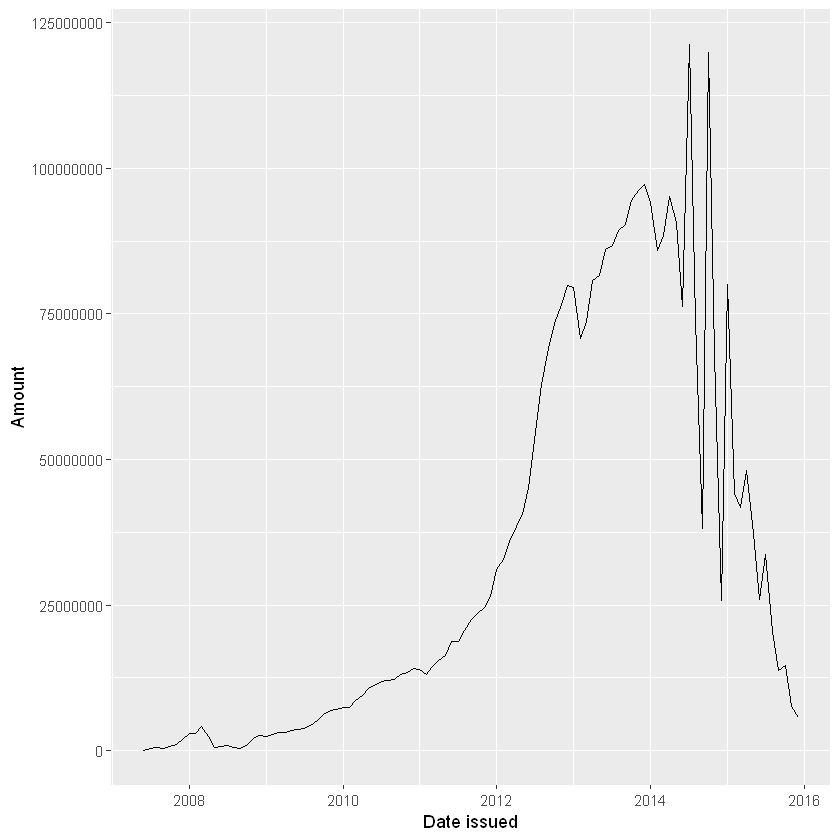

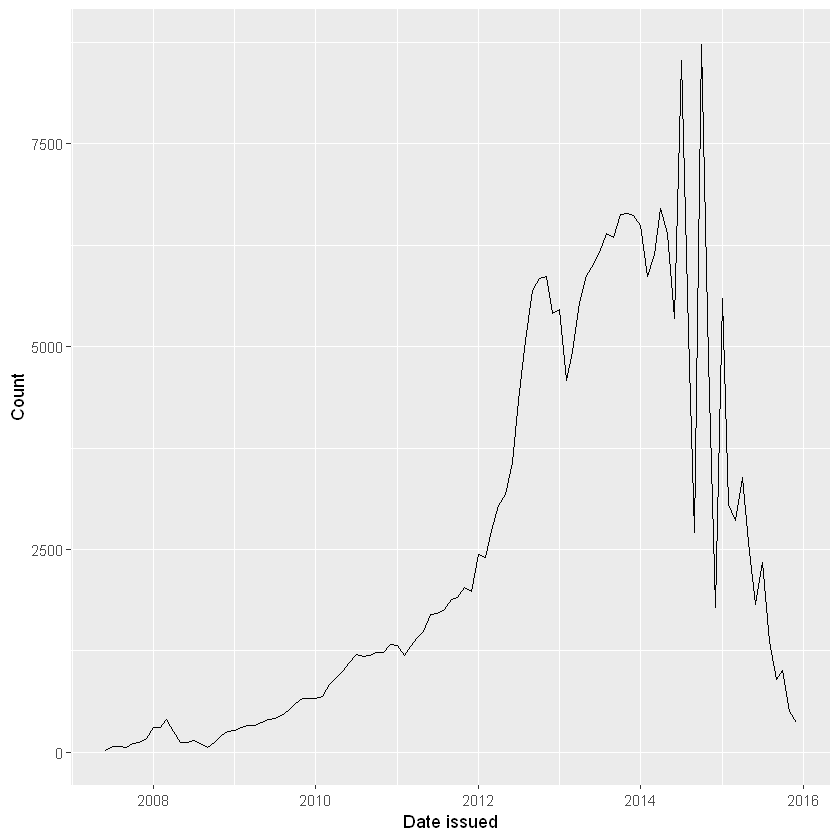

In [9]:
amnt_df <- loans %>% 
  select(issue_d, loan_amnt) %>% 
  group_by(issue_d) %>% 
  summarise(Amount = sum(loan_amnt),Count = n())

ts_amnt <- ggplot(amnt_df, 
                  aes(x = issue_d, y = Amount))
ts_amnt + geom_line() + xlab("Date issued")
ts_amnt <- ggplot(amnt_df, 
                  aes(x = issue_d, y = Count))
ts_amnt + geom_line() + xlab("Date issued")

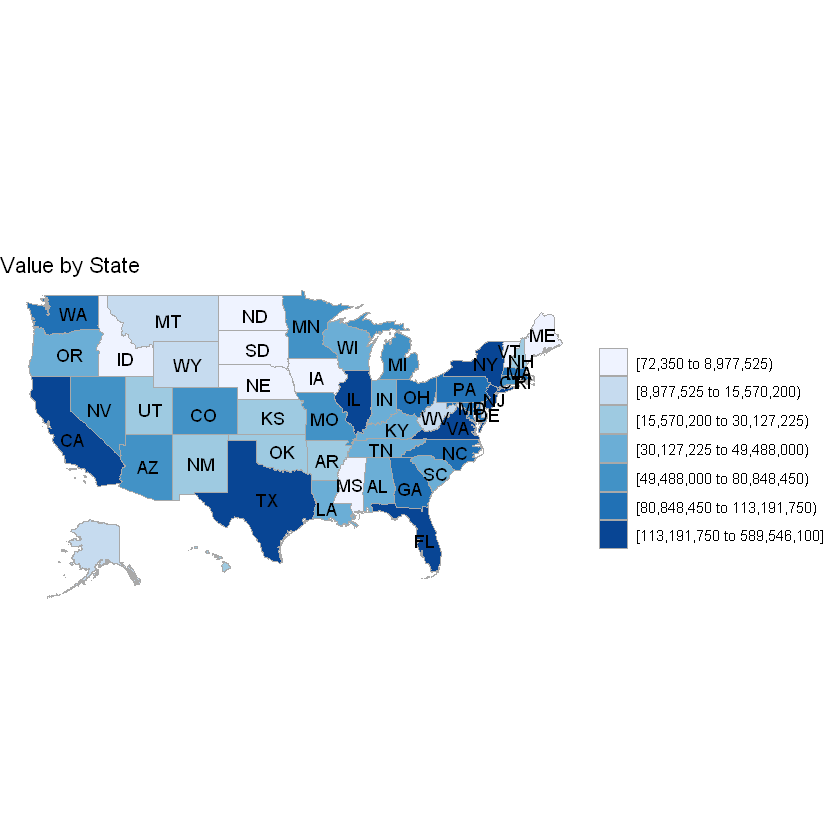

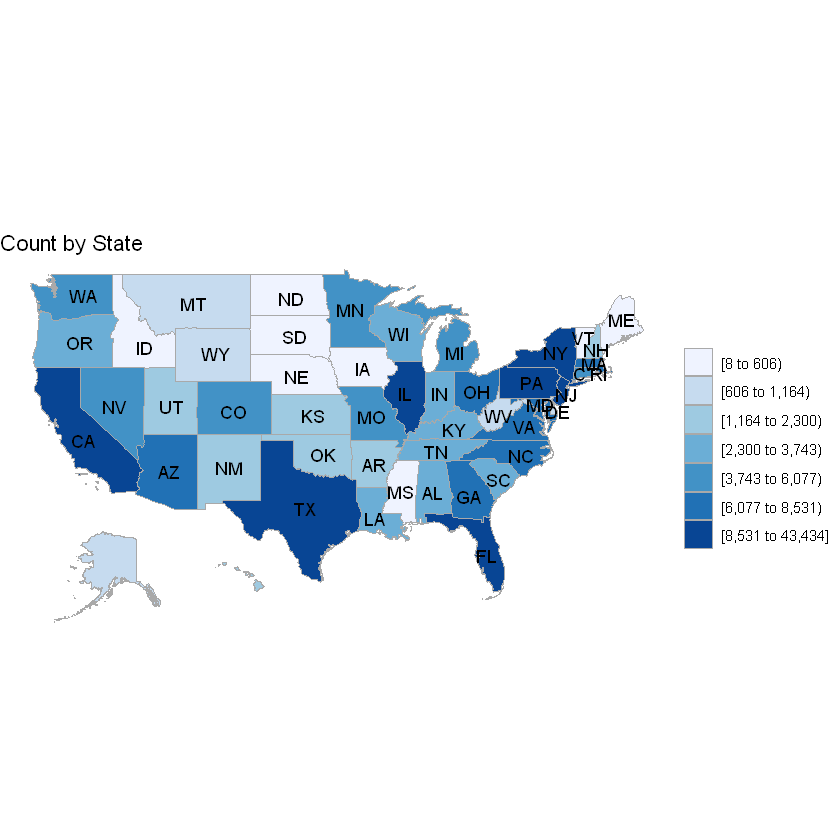

In [10]:
state_by_value <-
loans %>%rename(region = full_state) %>%mutate(region=tolower(region))%>% group_by(region) %>%
  summarise(value = sum(loan_amnt, na.rm=TRUE))

state_choropleth(state_by_value, title = "Value by State")

state_by_volume <-
loans %>%rename(region = full_state) %>%mutate(region=tolower(region))%>% group_by(region) %>%
  summarise(value = n())

state_choropleth(state_by_volume, title = "Count by State")

In [58]:
head(state_by_volume%>% arrange(desc(value)),10)

region,value
california,43434
new york,21586
texas,19524
florida,17776
new jersey,9734
illinois,9400
pennsylvania,8531
georgia,8118
virginia,8021
ohio,7841


In [62]:
head(state_by_volume%>% arrange(value),10)

region,value
north dakota,8
idaho,9
iowa,13
maine,13
nebraska,44
mississippi,428
vermont,431
south dakota,547
wyoming,606
alaska,668


<b>Checking PovertyRates Changes Vs Volume Of Loans By States

In [108]:
amnt_df <- loans %>% 
  select(issue_d, loan_amnt,full_state)%>% mutate(full_state=tolower(full_state))%>% mutate(issue_d=format(as.Date(issue_d, format="%d/%m/%Y"),"%Y")) %>%
  group_by(issue_d,full_state) %>% 
  summarise(Count = n())

poverty_rateByYears<- poverty_rate_ds%>%mutate(state_name=tolower(state_name))%>% select(year,poverty_rate_p,state_name)

amnt_df <- merge(amnt_df, poverty_rateByYears, by.x = c("issue_d","full_state"), by.y = c("year","state_name"))

issue_d,full_state,Count,poverty_rate_p
2007,alabama,9,0.145
2007,arizona,14,0.143
2007,arkansas,3,0.138
2007,california,7,0.127
2007,colorado,19,0.098
2007,connecticut,12,0.089
2007,delaware,1,0.093
2007,district of columbia,1,0.180
2007,florida,85,0.125
2007,georgia,37,0.136


In [155]:
plotPovertyLoansByCountry <- function(data,states){
   i <- 1
   glist <- list();
   for (state in states){
      df <- data %>%filter(full_state==state)
      g2 <- ggplot(df, aes(issue_d, Count)) +
               geom_point(data=df, aes(x=issue_d, y=Count,  size=poverty_rate_p))
      g2 <-g2 +labs(title=paste0("Loans Count Over PovertyRate in ",state))
      glist[[i]] <- g2
      i <- i + 1
    }
  return(glist)
} 

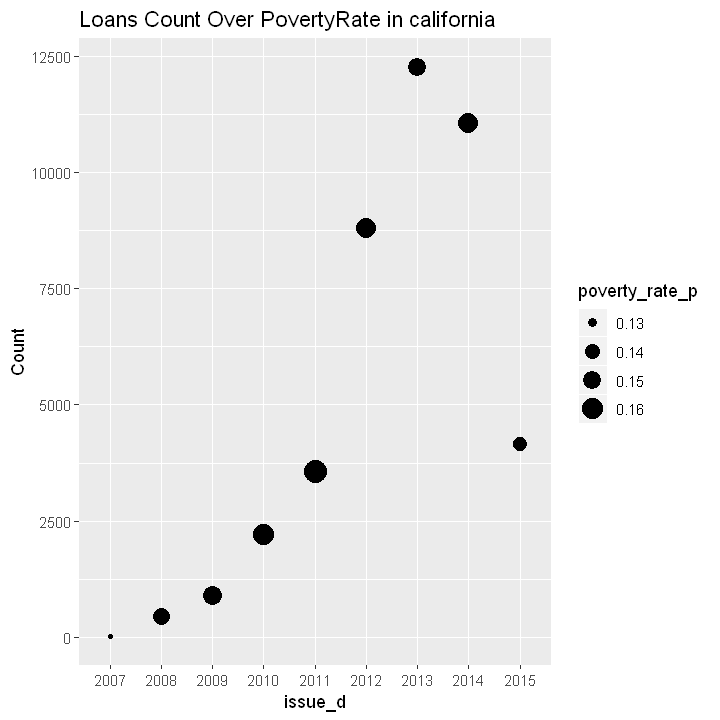

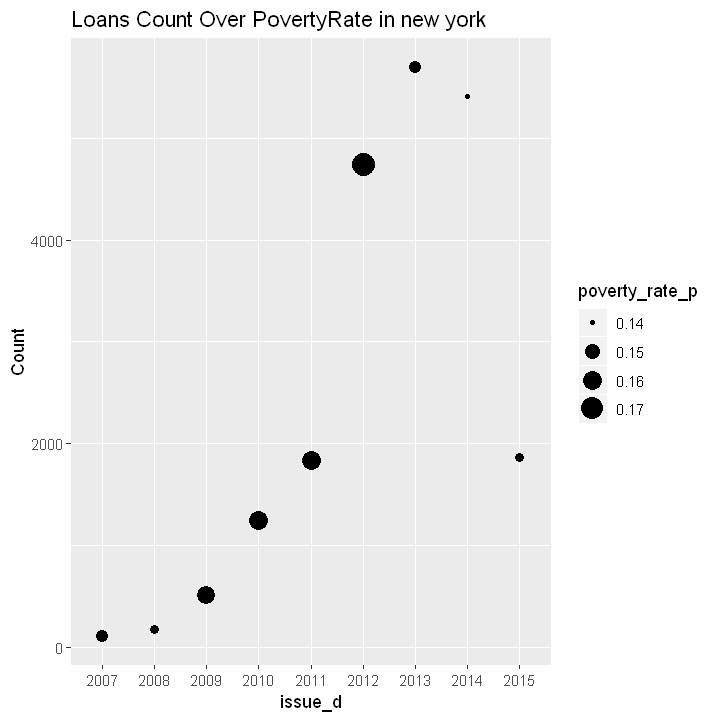

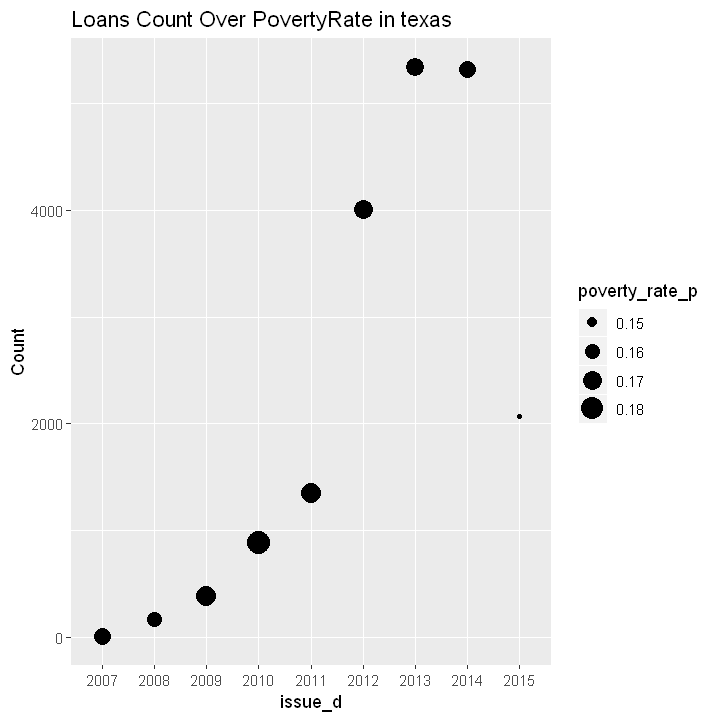

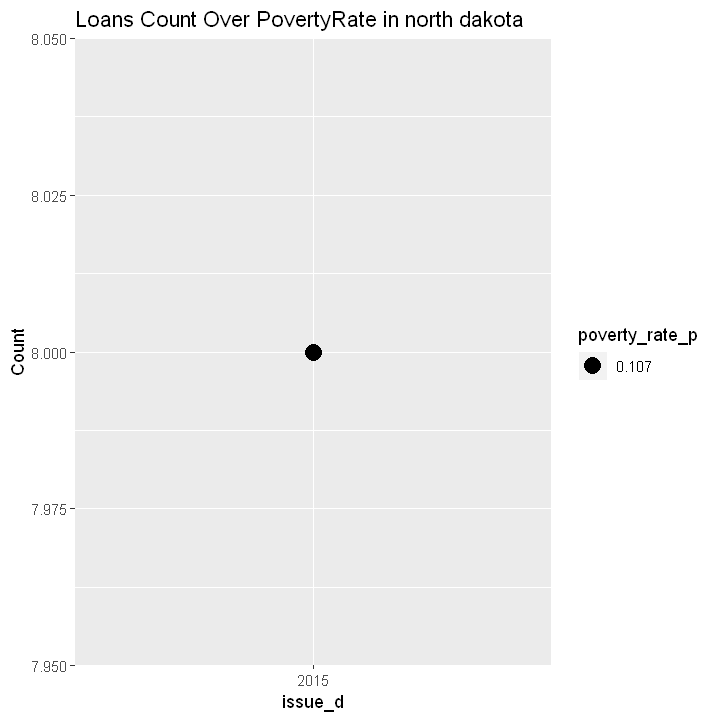

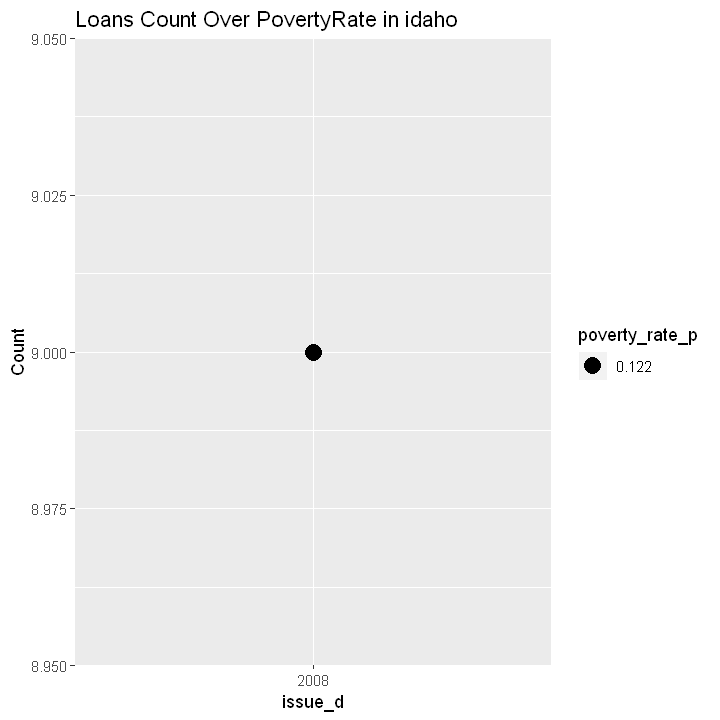

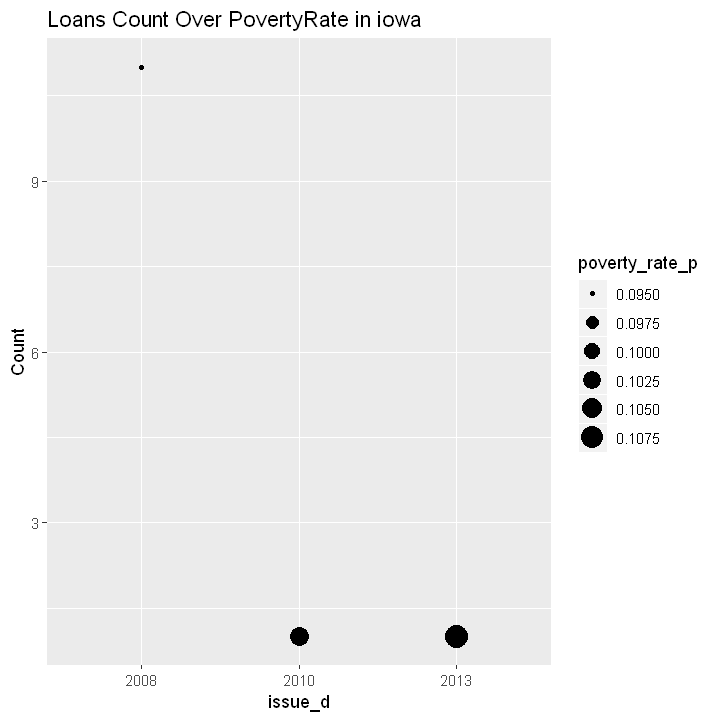

In [156]:
par(mfrow = c(1,2))
statesv <- c("california","new york","texas","north dakota","idaho","iowa")
plist<- plotPovertyLoansByCountry(amnt_df,statesv)
for (i in 1:length(plist))
    print(plist[[i]])

<b>Loans Purposes

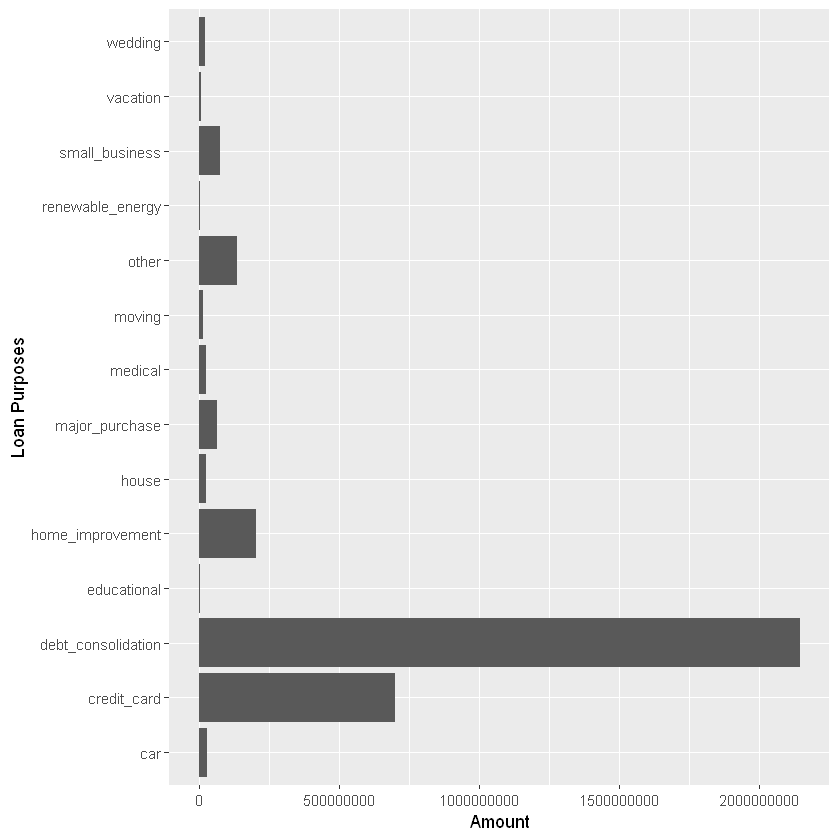

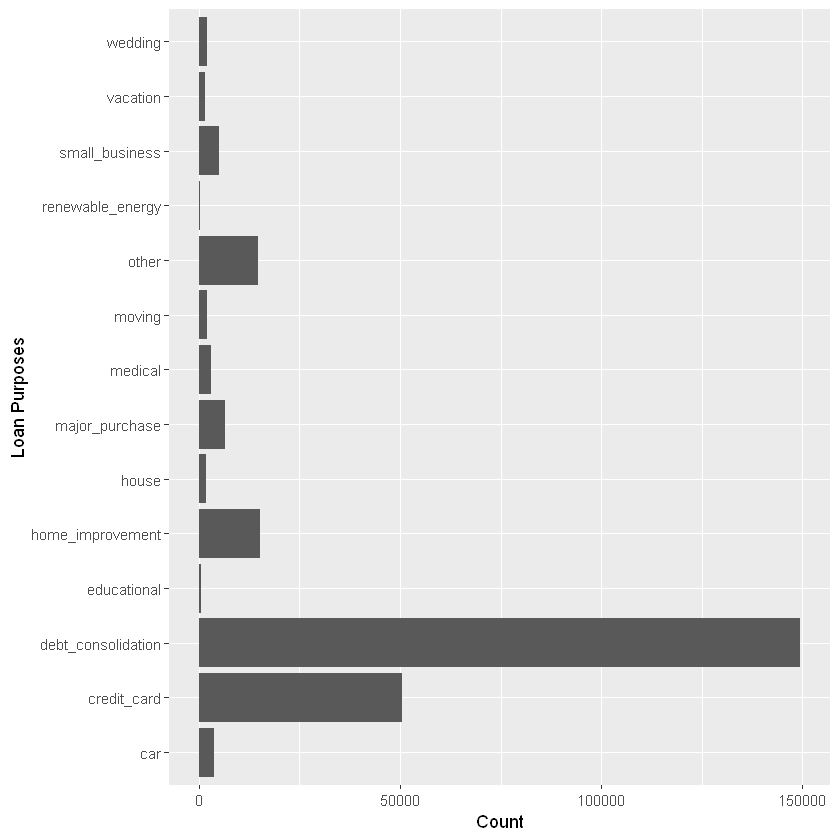

In [14]:
purposes_df <- loans %>% 
  select(purpose, loan_amnt) %>% 
  group_by(purpose) %>% 
  summarise(Amount = sum(loan_amnt),Count = n())

g <- ggplot(purposes_df, 
                  aes(x = purpose, y =Amount ))
g + geom_col() + xlab("Loan Purposes") + coord_flip()
g <- ggplot(purposes_df, 
                  aes(x = purpose, y = Count))
g + geom_col() + xlab("Loan Purposes")+ coord_flip()

<b> Loans By Home Ownership

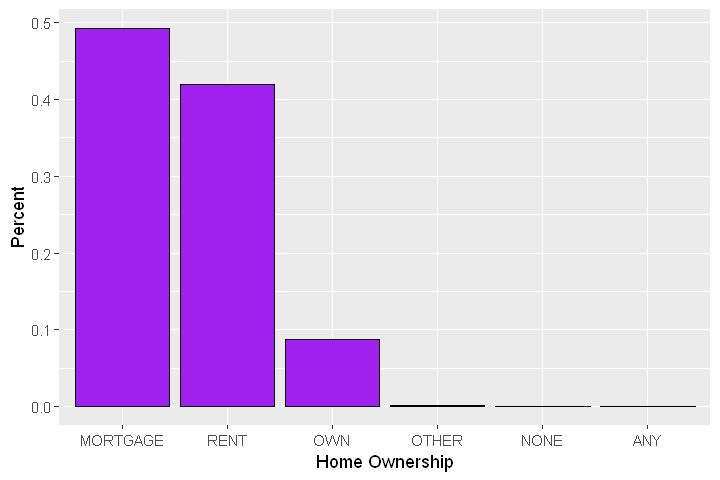

In [22]:
loans %>% group_by(home_ownership) %>% dplyr::summarise(count=n()) %>% 
mutate(pct=count/sum(count))%>% 
  ggplot(aes(x = reorder(home_ownership, -pct), y = pct)) + geom_bar(stat = "identity", fill = "purple", aes(color = I('black')), size = 0.1) + 
xlab("Home Ownership") + ylab("Percent")

<b>Home Ownership:</b> Rent and mortgage home owners account for around 90% of the loans

In [77]:
home_df <- loans %>% 
  select(home_ownership, loan_amnt,default) %>% 
  group_by(home_ownership,default) %>% 
  summarise(MeanL = mean(loan_amnt),Count = n())%>% 
select(home_ownership, MeanL,Count,default) 

In [80]:
home_df

home_ownership,MeanL,Count,default
ANY,5000.00,1,FALSE
MORTGAGE,14800.31,105874,FALSE
MORTGAGE,16460.04,20226,TRUE
NONE,12570.62,40,FALSE
NONE,12643.75,8,TRUE
OTHER,10419.68,141,FALSE
OTHER,11564.47,38,TRUE
OWN,12758.49,18099,FALSE
OWN,13618.92,4074,TRUE
RENT,11572.41,85556,FALSE


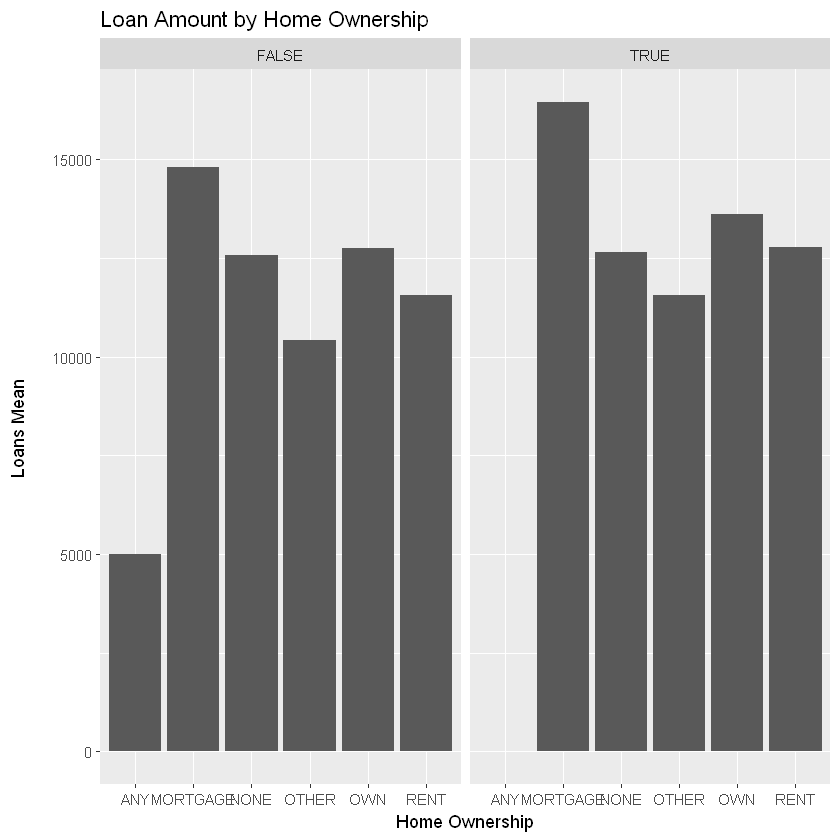

In [84]:
home_df %>%
  ggplot(aes(home_ownership,MeanL)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Amount by Home Ownership", x = "Home Ownership", y = "Loans Mean \n")

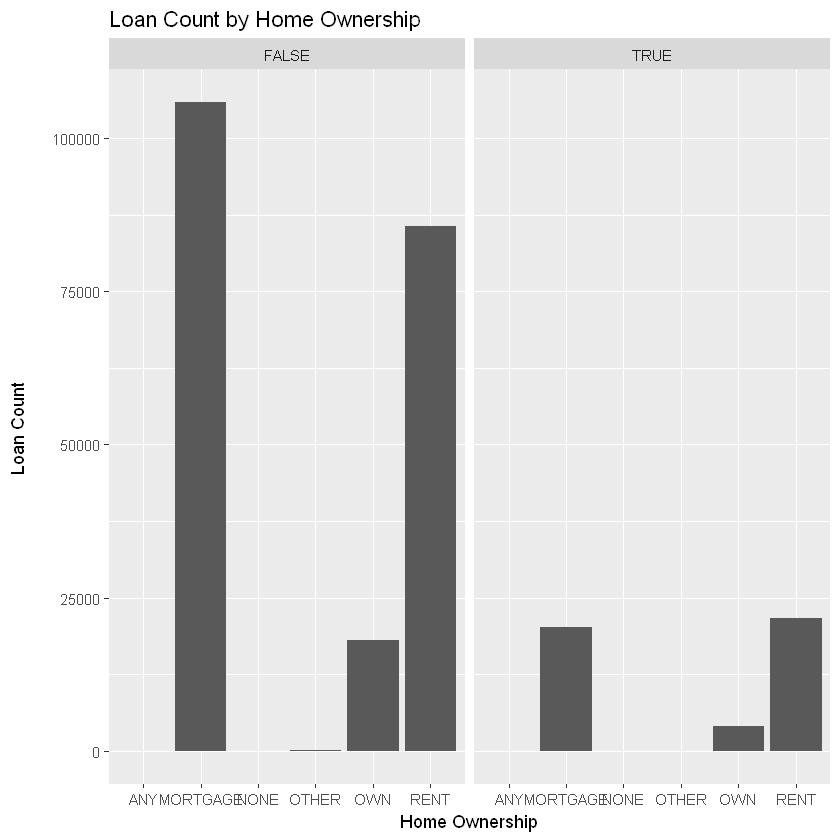

In [85]:
home_df %>%
  ggplot(aes(home_ownership,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by Home Ownership", x = "Home Ownership", y = "Loan Count \n")

<b> Loans By Emp Length

In [105]:
emp_df <- loans %>% 
  select(emp_length, loan_amnt,default) %>% 
  group_by(emp_length,default) %>% 
  summarise(MeanL = mean(loan_amnt),Count = n())%>% 
select(emp_length, MeanL,Count,default) 

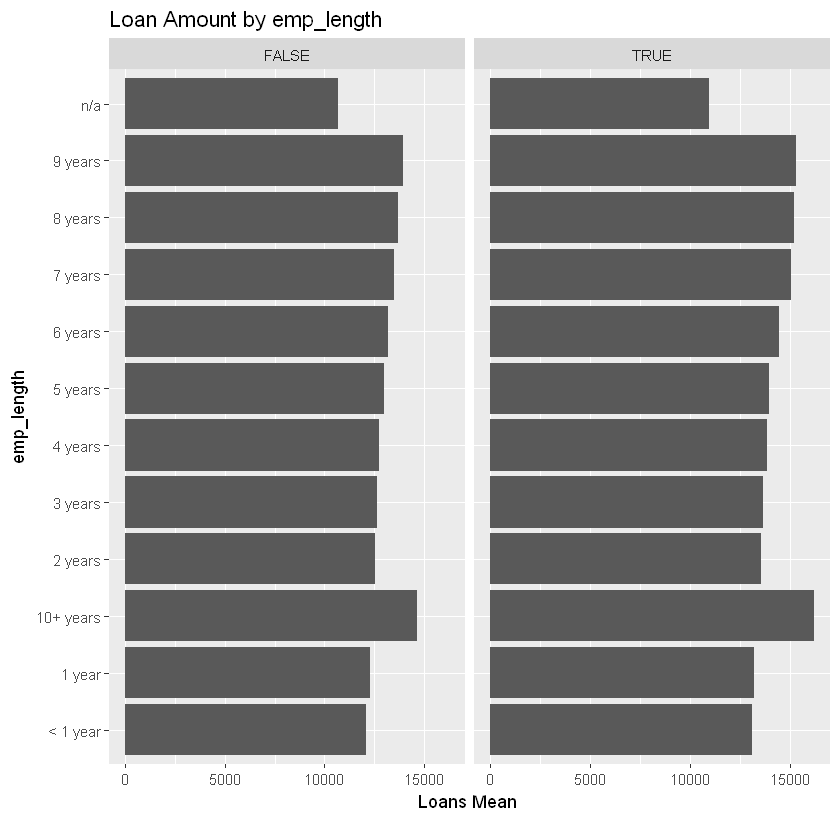

In [108]:
emp_df %>%
  ggplot(aes(emp_length,MeanL)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Amount by emp_length", x = "emp_length", y = "Loans Mean \n") + coord_flip()

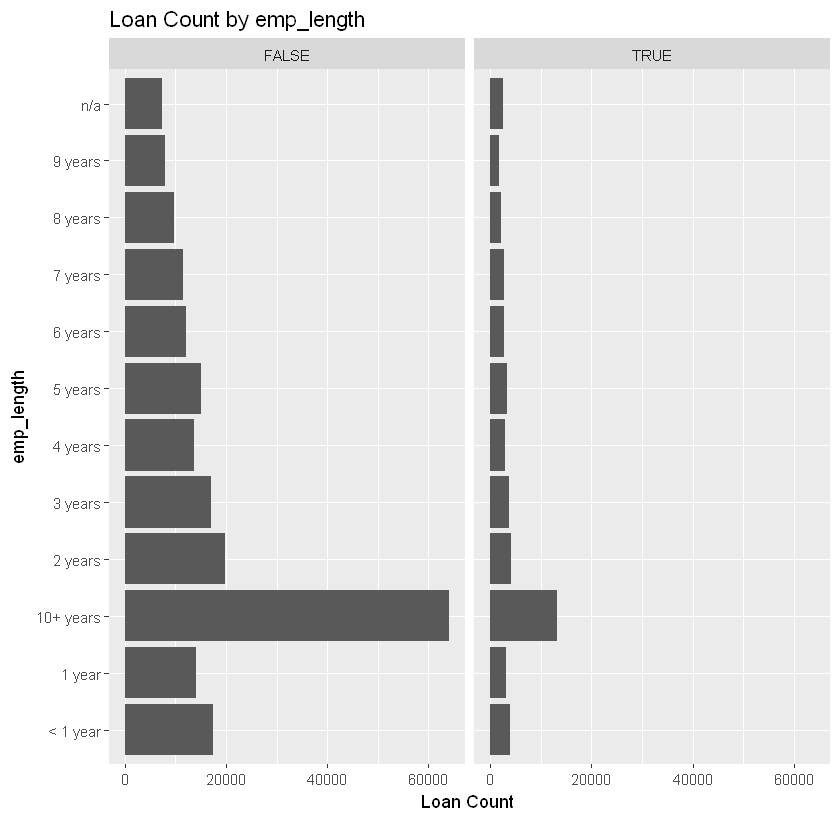

In [111]:
emp_df %>%
  ggplot(aes(emp_length,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by emp_length", x = "emp_length", y = "Loan Count \n")+ coord_flip()

<b> Loans By verification_status

In [112]:
ver_df <- loans %>% 
  select(verification_status, loan_amnt,default) %>% 
  group_by(verification_status,default) %>% 
  summarise(MeanL = mean(loan_amnt),Count = n())%>% 
select(verification_status, MeanL,Count,default) 

In [113]:
ver_df

verification_status,MeanL,Count,default
Not Verified,9608.226,75178,FALSE
Not Verified,9720.658,12719,TRUE
Source Verified,13927.660,60478,FALSE
Source Verified,14890.669,13822,TRUE
Verified,16545.892,74055,FALSE
Verified,17281.565,19468,TRUE


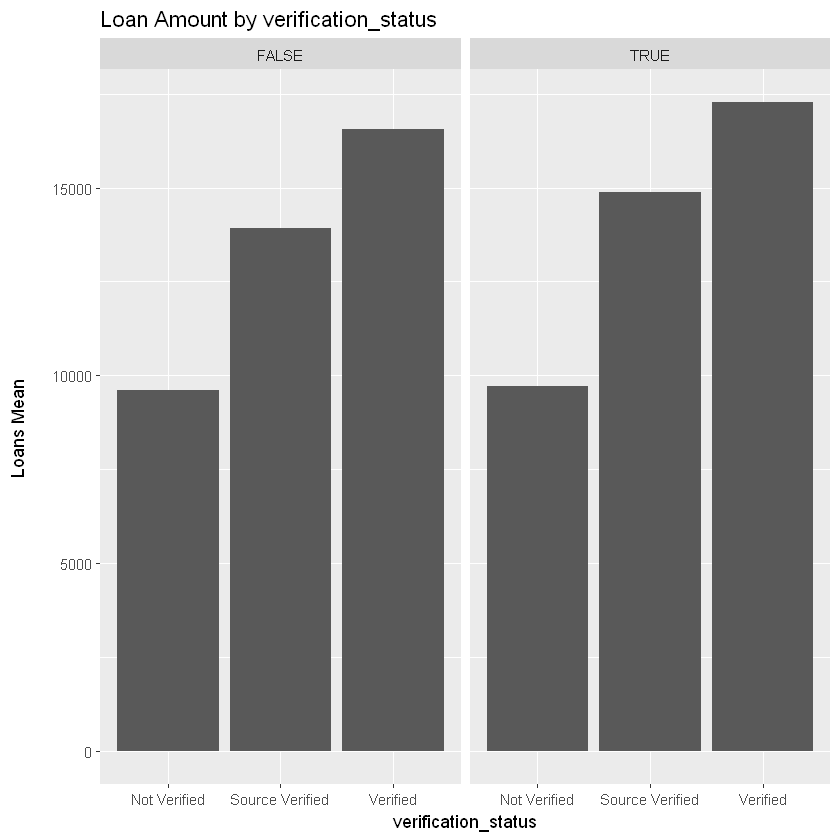

In [114]:
ver_df %>%
  ggplot(aes(verification_status,MeanL)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Amount by verification_status", x = "verification_status", y = "Loans Mean \n")

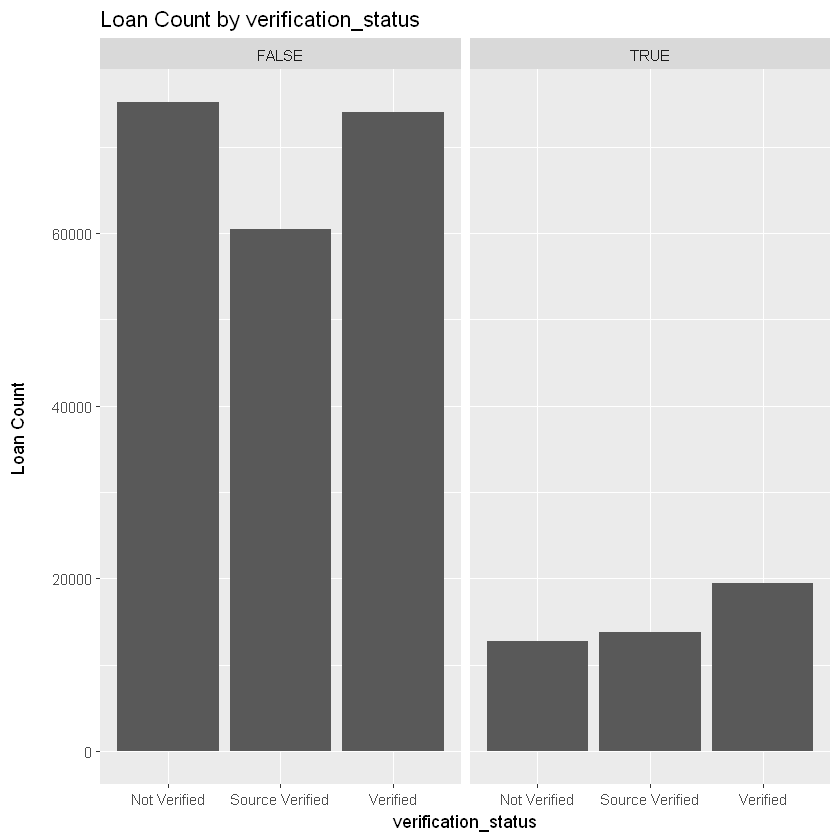

In [115]:
ver_df %>%
  ggplot(aes(verification_status,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by verification_status", x = "verification_status", y = "Loan Count \n")

<b> Loans By Term

In [25]:
loans$term_fac<- factor(loans$term,labels=c("36 Months", "60 Months"))

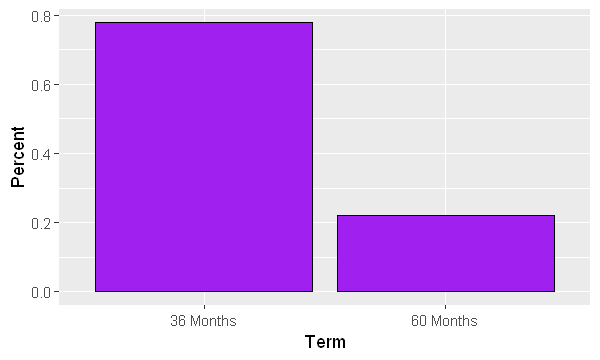

In [27]:
options(repr.plot.width=5, repr.plot.height=3)
#i. Term
loans %>% group_by(term_fac) %>% dplyr::summarise(count=n()) %>% mutate(pct=count/sum(count))%>% 
  ggplot(aes(x = term_fac, y = pct)) + geom_bar(stat = "identity", fill = "purple", aes(color = I('black')), size = 0.1)+xlab("Term") + 
ylab("Percent")

Number of loans issued for 36 months are more than 60 months

In [10]:

term_df <- loans %>% 
  select(term_fac, loan_amnt,default) %>% 
  group_by(term_fac,default) %>% 
  summarise(MeanL = mean(loan_amnt),Count = n())%>% 
select(term_fac, MeanL,Count,default) 

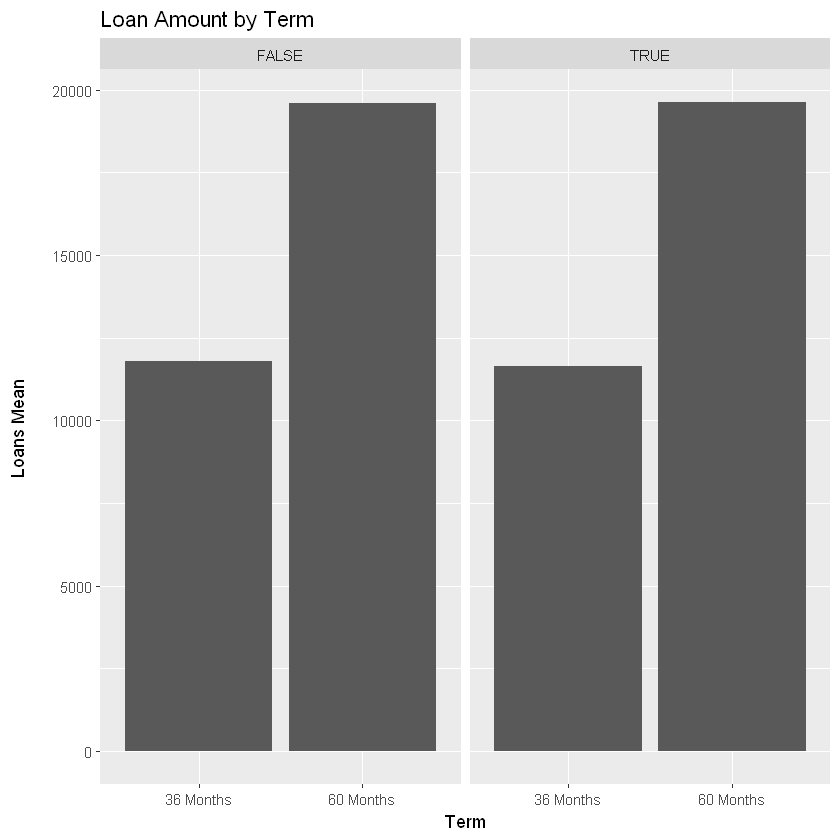

In [12]:
term_df %>%
  ggplot(aes(term_fac,MeanL)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Amount by Term", x = "Term", y = "Loans Mean \n")

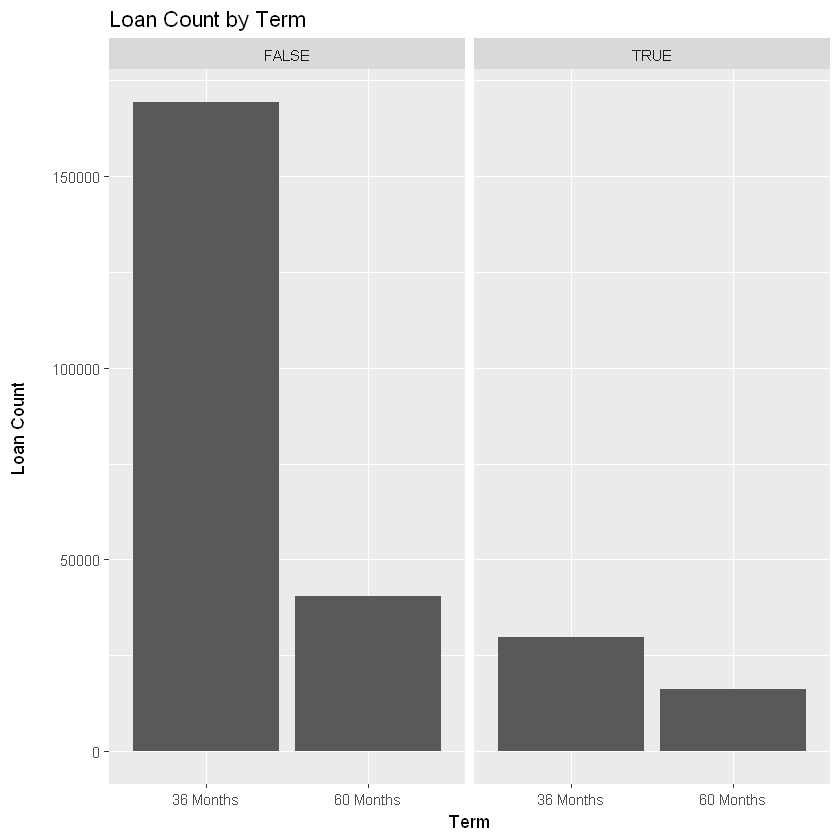

In [13]:
term_df %>%
  ggplot(aes(term_fac,Count)) +
  geom_col() +
  facet_wrap(~ default) +
  labs(title="Loan Count by Term", x = "Term", y = "Loan Count \n")

In [14]:
loans$term_fac<-NULL

<b>Default Over Numeric Variables

In [15]:
numeric_cols <- sapply(loans, is.numeric)

In [16]:
loansWitnNumeric <- loans[,numeric_cols]
split(names(loansWitnNumeric),sapply(loansWitnNumeric, function(x) paste(class(x), collapse=" ")))
length(loansWitnNumeric)

$integer
 [1] "loan_id"                     "pymnt_plan"                 
 [3] "initial_list_status"         "loan_amnt"                  
 [5] "funded_amnt"                 "term"                       
 [7] "out_prncp"                   "out_prncp_inv"              
 [9] "collections_12_mths_ex_med"  "mths_since_last_major_derog"
[11] "delinq_2yrs"                 "acc_now_delinq"             
[13] "inq_last_6mths"              "mths_since_last_delinq"     
[15] "mths_since_last_record"      "open_acc"                   
[17] "pub_rec"                     "revol_bal"                  
[19] "total_acc"                   "tot_coll_amt"               
[21] "open_acc_6m"                 "open_il_6m"                 
[23] "open_il_12m"                 "open_il_24m"                
[25] "mths_since_rcnt_il"          "total_bal_il"               
[27] "open_rv_12m"                 "open_rv_24m"                
[29] "max_bal_bc"                  "inq_fi"                     
[31] "total_cu_tl"                 "inq_last_12m"               

$numeric
 [1] "funded_amnt_inv"         "installment"            
 [3] "total_pymnt"             "total_pymnt_inv"        
 [5] "total_rec_prncp"         "total_rec_int"          
 [7] "total_rec_late_fee"      "recoveries"             
 [9] "collection_recovery_fee" "last_pymnt_amnt"        
[11] "annual_inc"              "dti"                    
[13] "revol_util"              "tot_cur_bal"            
[15] "il_util"                 "all_util"               
[17] "total_rev_hi_lim"        "loan_installment"

[1] 50

In [57]:
splitAndPlotVars <- function(data){
   if(!require(reshape2)) {install.packages("reshape2");require(reshape2)}
   glist <- list();
   g<-1
   i<-1
   while (i <ncol(data)){
      if ((i+5)>ncol(data))
       upper <-ncol(data)
      else
       upper <-i+5  
      df <- cbind(data[,c(i:upper)],default=loans[,'default'])
      df_f <- melt(df, id="default")
      p <- ggplot(aes(x = value, group = default, colour = factor(default)), 
            data = df_f) +
        # create the plot to check if there are any good variables that can be used in predictive models
        geom_density() + facet_wrap(~variable, scales="free")
      print(p)
     # glist[[g]] <- p
      i <- i + 6
      g <- g + 1
    }
  return(glist)
} 

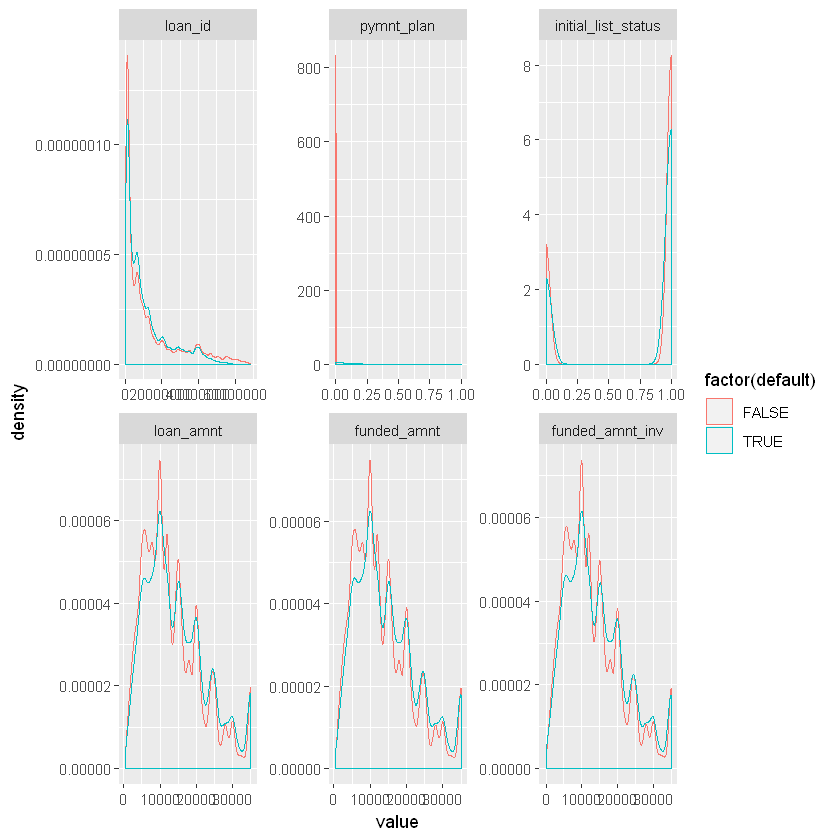

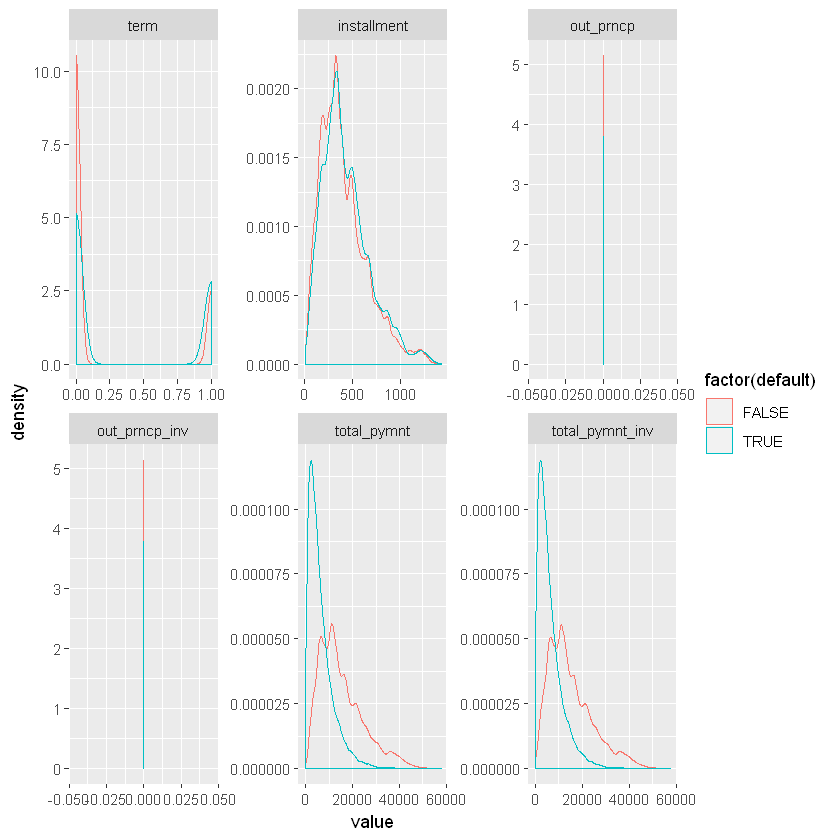

Warning message:
"Removed 208382 rows containing non-finite values (stat_density)."

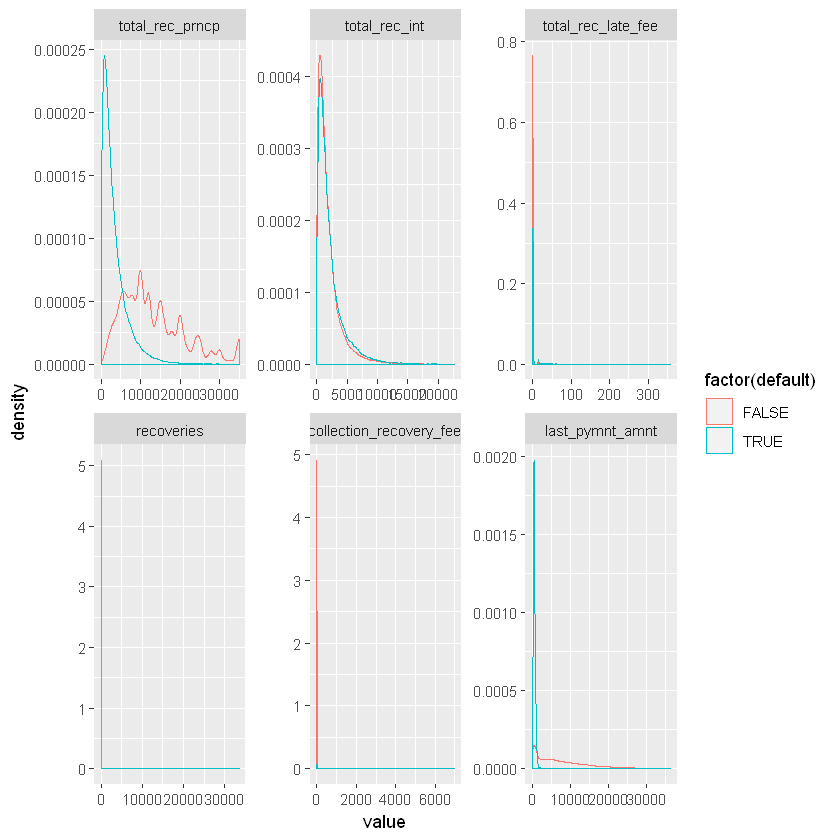

Warning message:
"Removed 365367 rows containing non-finite values (stat_density)."

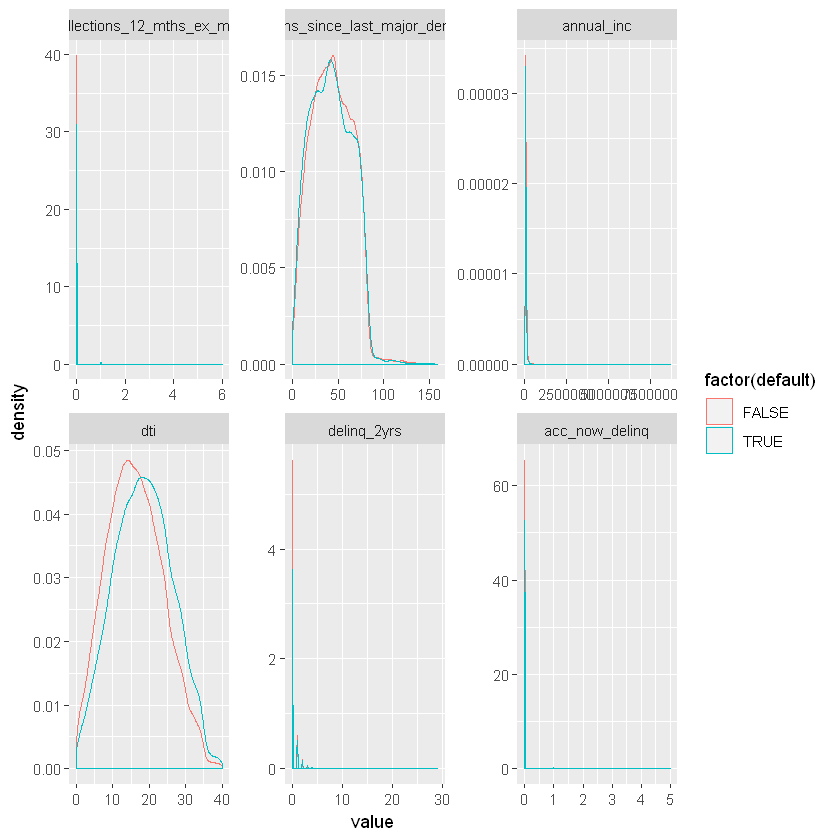

Warning message:
"Removed 644334 rows containing non-finite values (stat_density)."

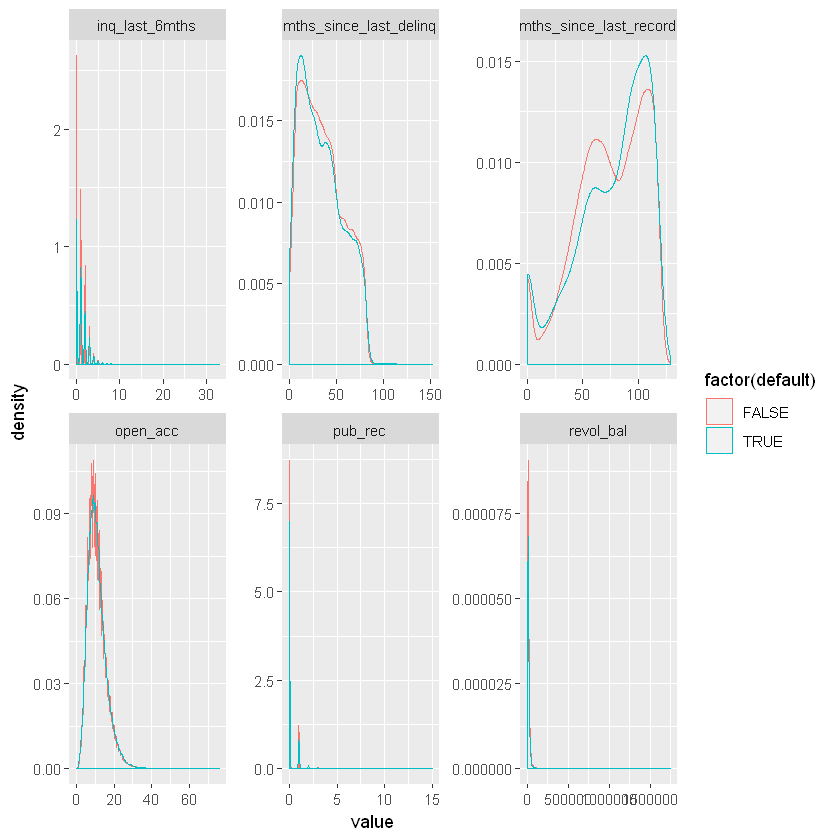

Warning message:
"Removed 1533478 rows containing non-finite values (stat_density)."

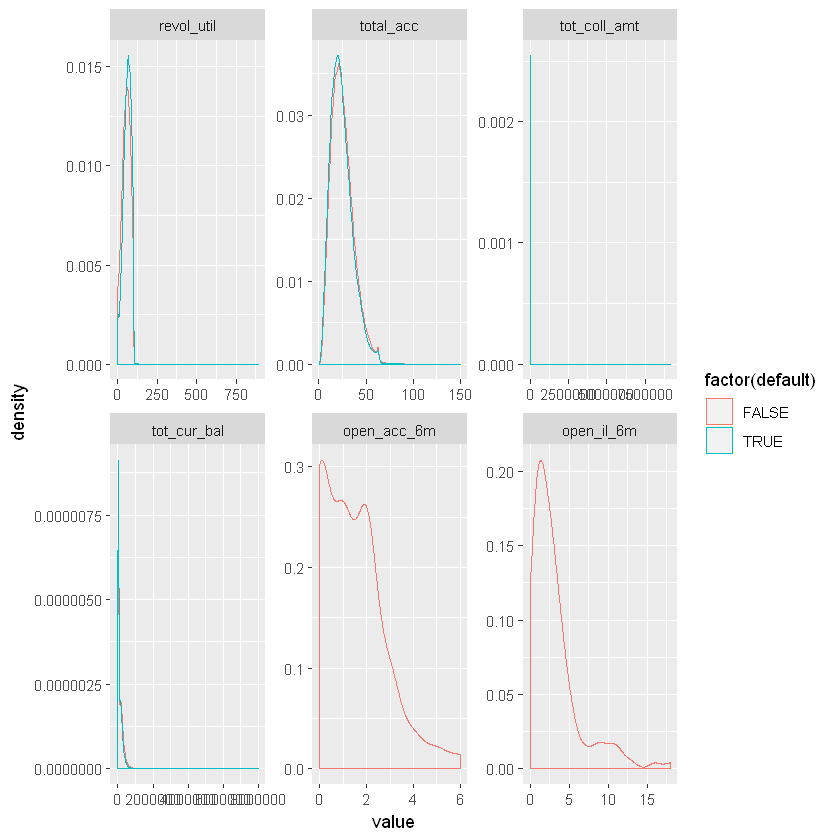

Warning message:
"Removed 1344337 rows containing non-finite values (stat_density)."

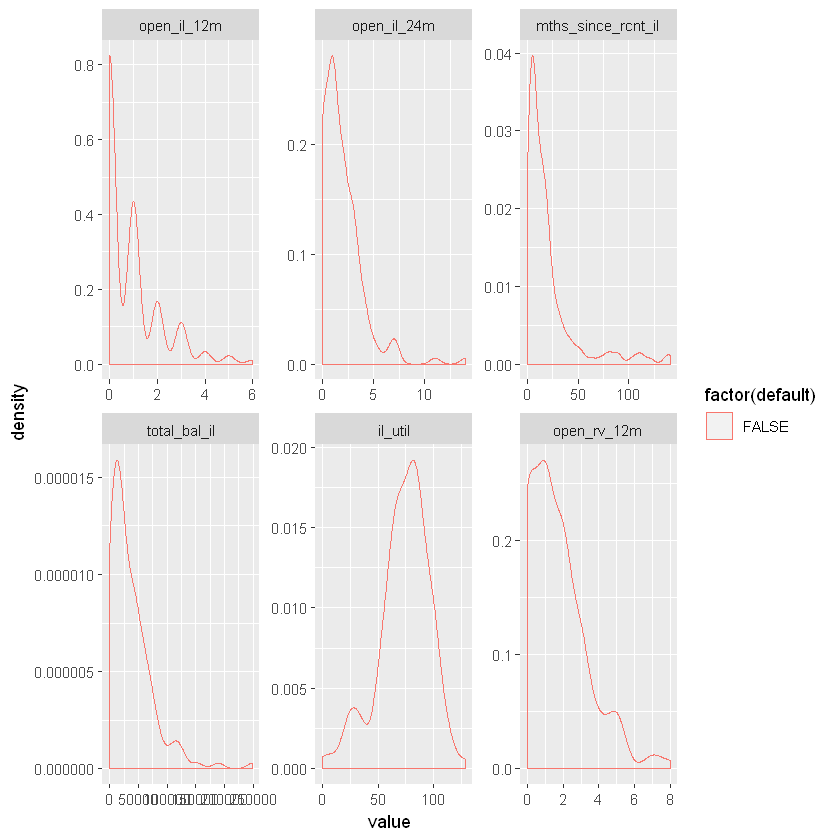

Warning message:
"Removed 255576 rows containing non-finite values (stat_density)."

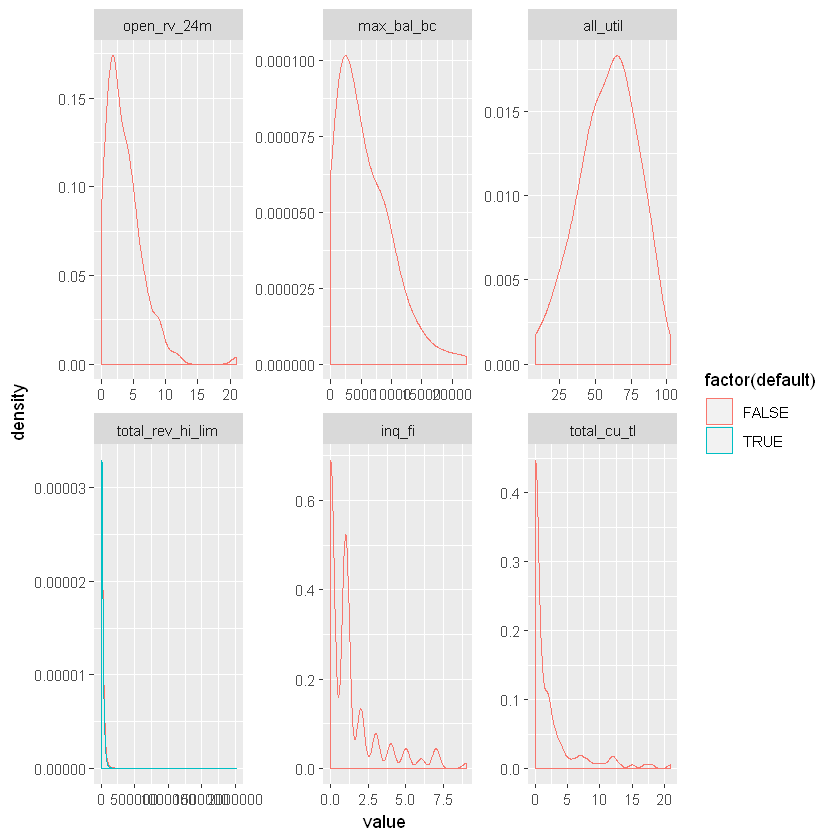

list()

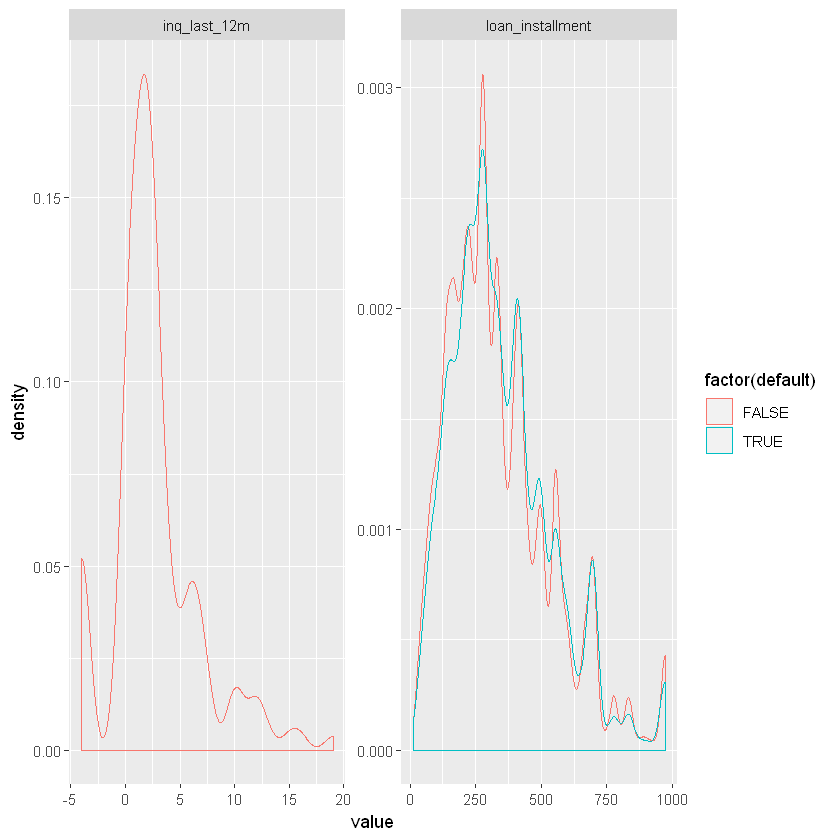

In [58]:
splitAndPlotVars(loansWitnNumeric)

<b> Loan Amount Vs Annual Income

Warning message:
"Removed 4 rows containing missing values (geom_point)."

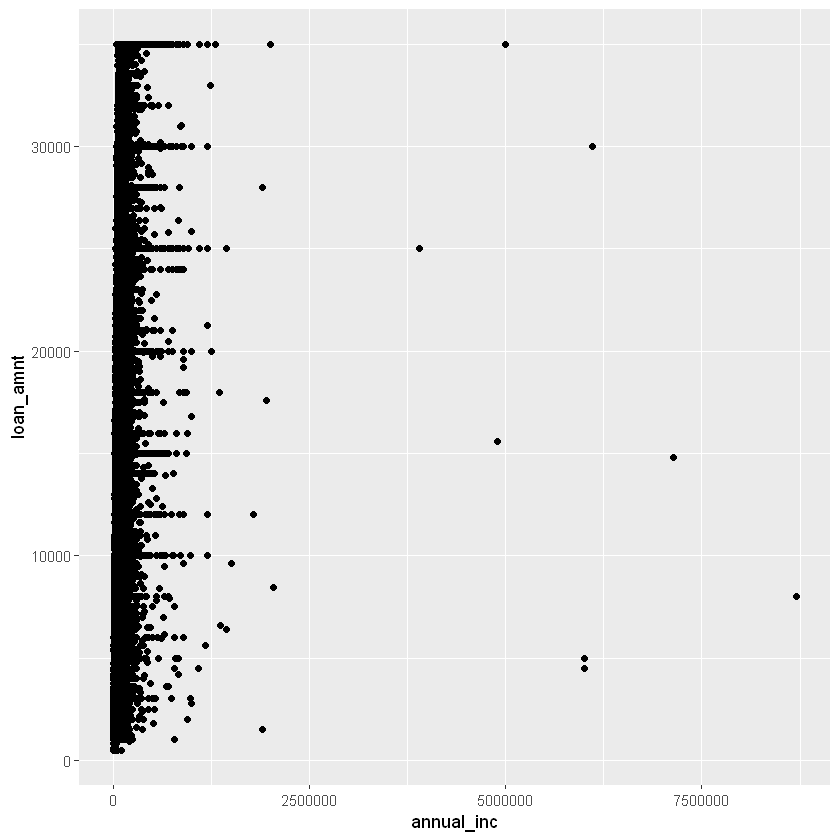

In [87]:
loans %>%
  ggplot(aes(x = annual_inc, y = loan_amnt)) +
  geom_point()

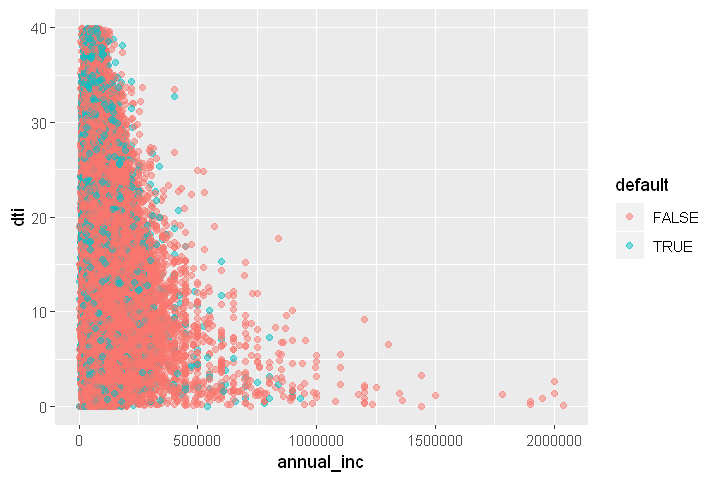

In [21]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(filter(loans,annual_inc < 2500000), aes(x = annual_inc, y = dti, color = default)) + 
geom_point(alpha=0.5)

<b>Correlation

In [17]:
num_vars <- 
  loans %>% 
  sapply(is.numeric) %>% 
  which() %>% 
  names()
num_vars <-num_vars[!num_vars %in% c("loan_id","pymnt_plan","initial_list_status","term","out_prncp","out_prncp_inv")]


In [11]:
if(!require(corrplot)) {install.packages("corrplot");require(corrplot)}
corrplot::corrplot(cor(loans[, num_vars], use = "complete.obs"), 
                   method = "pie", type = "upper",tl.cex = 0.3)

Loading required package: corrplot
corrplot 0.84 loaded


ERROR: Error in `[.data.frame`(loans, , num_vars): object 'num_vars' not found
